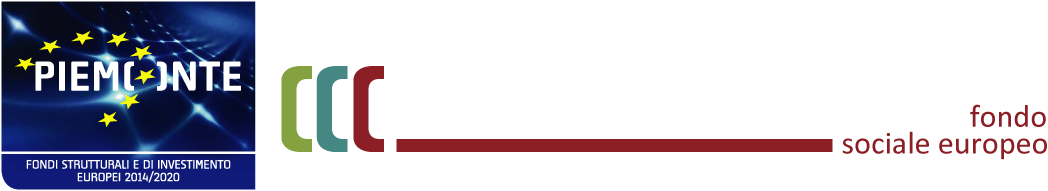





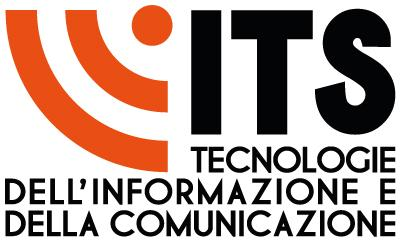




**Unità Formativa (UF):** AI e Machine Learning - Python

**Docente:** Fabio Giuseppe Antonio Gagliardi

**Titolo argomento:** esercizi lezione 8-9


---

***Istruzioni per lo svolgimento dell'esercizio***

*Ogni "step" è costituito da un obiettivo da raggiungere e, a seguire, da un blocco di codice, dove sviluppare una soluzione*


---

# **Descrizione dei dati**

**Dataset:**
- Raccolta dati medici sulle condizioni di salute e lo stile di vita legate alle malattie cardovascolari
 **mecical_examination.csv**

**fonte:**




**dati:**

* age: età espressa in giorni
* sex: 
  1. donne
  2. uomini
* height: altezza espressa in cm
* weight: peso espresso in kg
* ap_hi: pressione massima
* ap_lo: pressione minima
* cholesterol: 
  1. normale
  2. sopra il normale
  3. ben al di sopra del normale
* gluc:  
  1. normale, 
  2. sopra il normale
  3. ben al di sopra del normale
* smoke: 
  1. si
  2. no
* alco:
  1. si
  2. no
* active (attività fisica)
  1. si
  2. no
* cardio 
  1. si
  2. no

  








---



# **Librerie**

Importare nel progetto le librerie necessarie allo svolgimento dell'esercizio.
  

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Organizzazione e preparazione dei dati**

* Creare una class per il DataFrame.
* Creare i metodi necessari a facilitare l' accesso al DataFrame. 
 * accesso per seleszione (le singole tabelle)
 * accesso per maschere   (fumatori, fumatori maschi, ecc)
  


In [3]:
# ====================================================================================================
# Creao una classe per accedere in modo ordinato ai dati
# ====================================================================================================
# ma, prima di definire costruttore e metodi, leggo le richeste dell'esercizio
# per capire quali funzionalità mi possono tornare utili.
# 
#   construttore: nel costruttore andrò a definire come membro una variabile che 
#                 contenga l'intero data frame.
#                 Leggo alla richiesta 1 il suggerimento sul riordino dell'array.
#                 Decido di ordinare il dataset in base agli anni in ordine crescente.
#                 Valorizzando il parametro formale "inplace" con "True",
#                 decido di rendere permanente la modifica.
#
#   display(): metodo per stampare l'intero dataset.
#              Ricordarsi che la funzione display() funziona solo su Colab.
#
#   get_mask_(filter, value): serie di metodi che restiuiscono una maschera booleana per la selezione
#                            basata sulla comparazione con il parametro "value" 
# 
#   select(column) -> array: metodo per la selezione "filtrata" dei dati che 
#                            prende come parametro formale una stringa e restituisce un np.array.
#                            scelgo di usare gli array di numpy perchè:
#                            1) mi da una rappresentazione dei dati attraverso 
#                               un blocco uniforme di valori.
#                            2) separo la parte di lettura dei dati dalla parte operativa.
#                               In una colonna potrebbe sempre capitare ci siano anche stringhe o valori
#                               espressi in una scala o in un unità di miusra diversi. 
# 
#  
#   select_by_mask(str, column, ) -> array: dichiaro un metodo per ottenere dati
#                                           da una maschera booleana.


class MedicalData():
  # costruttore
  def __init__(self):
    # ricordarsi che la dichiarazione dei membri interni ad una classe 
    # va attuata inserendo il suffizzo "self" pria del nome della variabile
    self.df = pd.read_csv('https://github.com/FabioGagliardiIts/ai_ml_python/raw/main/Esercizi/Lezioni_8_9/medical_examination.csv')
    self.df.sort_values( by=['age'],  inplace=True)
  

  def display(self):
    display(self.df)


  def get_mask_equal(self, filter: str, value)->  np.array(np.bool8):
    return self.df[filter] == value

  def get_mask_greater(self, filter: str, value)->  np.array(np.bool8):
    return self.df[filter] > value

  def get_mask_greaterequal(self, filter: str, value)->  np.array(np.bool8):
    return self.df[filter] >= value   

  def get_mask_less(self, filter: str, value)->  np.array(np.bool8):
    return self.df[filter] < value

  def get_mask_lessequal(self, filter: str, value)->  np.array(np.bool8):
    return self.df[filter] <= value


  def select(self, column: str) -> np.array:
    return self.df[column].to_numpy()

  def select_by_mask(self, column: str, mask: np.array(np.bool8)) -> np.array:
    return self.df[column][mask].to_numpy()







# ================================================================
# creo un instanza della classe MedicalData da usare nel progetto
# ===============================================================
md = MedicalData()




# **Richiesta 1**

Può essere utile  modificare il DataFrame riordinandolo sulla base dei dati di una colonna?

\

Consultare il cheat_sheet su pandas aggiornato con la voce* "Riordinare un dataframe sulla base dei dati di una colonna"*.

\
Dopodichè, nel caso lo si ritensse opprotungo,  scegliere l'attributo più indicato per riordinare tutto il dataset.

In [4]:
# =============================
# visualizzare la nuova tabella
# =============================

md.display()


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
22343,31922,10798,2,175,92.0,100,60,1,1,0,0,1,0
30666,43842,10859,1,159,59.0,120,80,1,1,0,0,1,0
6219,8850,10878,1,175,59.0,120,80,1,1,0,0,1,0
55905,79749,10964,1,160,59.0,110,70,1,1,0,0,1,0
31762,45362,14275,1,164,105.0,150,110,3,3,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36603,52297,23687,2,163,55.0,120,80,3,1,1,0,1,1
20931,29892,23690,1,165,63.0,150,90,2,1,0,0,1,1
50714,72373,23692,2,167,68.0,120,80,2,2,0,0,0,1
68005,97124,23701,1,178,75.0,120,80,1,1,0,0,1,1




---


***suggerimento:***
\
*Calcolare le medie e visualizzare i dati usando le maschere di selezione (vedere pandas_cheat_sheet aggiornato con l'esempio di maschera composta)*


---



# **Richiesta 2**







* Qaul'è l'età media degli uomini?
* Qual'è l'età media delle donne?
* Qaul'è l'età media generale?


In [5]:
# creo le maschere per selezionare i dati
mask_women = md.get_mask_equal("sex", 1)
mask_men   = md.get_mask_equal("sex", 2)

# ottengo l' np.array con i dati sull'età
ages = md.select("age")
print(ages)
# ottengo due np.array, uno per l'età delle donne l'altro per l'età degli uomini.
women_ages = md.select_by_mask("age", mask_women)
men_ages   = md.select_by_mask("age", mask_men)


# creo le medie
women_ages_mean = women_ages.mean()
men_ages_mean   = men_ages.mean()
ages_mean       = ages.mean()

print("MEDIA ANNI DONNE: ",  int(women_ages_mean / 365.0))
print("MEDIA ANNI UOMIN: ",  int(men_ages_mean / 365.0))
print("MEDIA ANNI TOTALE: ", int(ages_mean / 365.0))



[10798 10859 10878 ... 23692 23701 23713]
MEDIA ANNI DONNE:  53
MEDIA ANNI UOMIN:  53
MEDIA ANNI TOTALE:  53


# **Richiesta 3**




**A partire dai dati sul fumo e sul consumo di alcol, atturare le seguenti analisi.**

\

 * Quant'è la percentuale tra le donne
 * Quant'è la percentuale tra gli uomini
 * Quant'è la percenutale in totale

**media**
* Qaul'è l'età media  tra le donne
* Qual'è l'età media  tra gli uomini?
* Qaul'è l'età media  in generale?

**varianza**
* Quanto varia il dato delle donne  rispetto alla media?
* Quanto varia il dato degli uomini rispetto alla media?
* Quanto varia il dato alla media.

**deviazione standard**
* Quanto è disperso il dato delle donne  rispetto alla media?
* Quanto è disperso il dato degli uomini  rispetto alla media?
* Quanto è disperso il dato in gerele rispetto alla media.

**visualizzazione**
* Visualizzare in percentuale fumatori non fumatori, consumatori di alcol e non (donne, uomini, tot.)
* Visualizzare i dati sul fumo e sull'alcol (donne, uomin, tot.) con media e dev.standard.





---


# ***suggerimento:***
\
*Per una visualizzazione più ordinata, potrebbe essere una buona idea raggruppare le visulizzazioni relative al fumo e quelle relative all'alcol in due layout separati.
 \
 Dare un occhiata al cheat_sheet di matplotlib alla voce:
 SUBPLOT AND STYLE*

---



In [6]:
from pyparsing.helpers import alphanums
# ======================
# FUNZIONI PER I GRAFICI
# ======================

# 
def plot_bar(women_size: int,
             men_size: int, 
             tot_size: int, 
             color: str, 
             alpha: float):
  bx = np.array(["women", "men", "total"])
  by = np.array([women_size, men_size, tot_size])

  label =  " women: " + str(women_size) + "\n men: "+ str(men_size) + "\n tot:" + str(tot_size) 

  plt.bar(bx, by,  color=color, alpha=alpha, label=label)
  plt.xticks(rotation=45)
  plt.legend(bbox_to_anchor=(1.2, 1.03)) 


  


def plot_perc(women, men, tot):
  plt.figure(figsize=(15, 12))

  # creao un layout di 1 riga con tre grafici a torta
  # affiancati (vedre suggerimento)

  plot_perc_1 = plt.subplot(1, 3, 1)
  plot_perc_1.set_title("women")
  plot_perc_1.pie([women, 100. - women], autopct = '%2.2f%%', colors = ["pink", "green"])

  plot_perc_2 = plt.subplot(1, 3, 2)
  plot_perc_2.set_title("men")
  plot_perc_2.pie([men, 100. - men], autopct = '%2.2f%%', colors = ["blue", "green"])

  plot_perc_3 = plt.subplot(1, 3, 3)
  plot_perc_3.set_title("total")
  plot_perc_3.pie([tot, 100. - tot], autopct = '%2.2f%%', colors = ["orange", "green"])





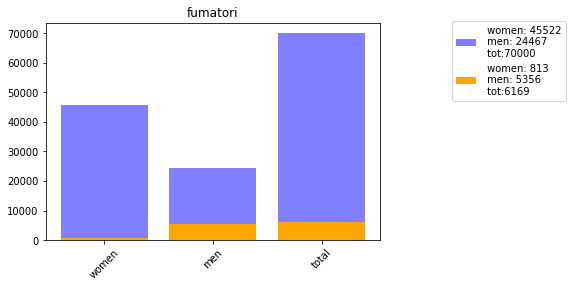

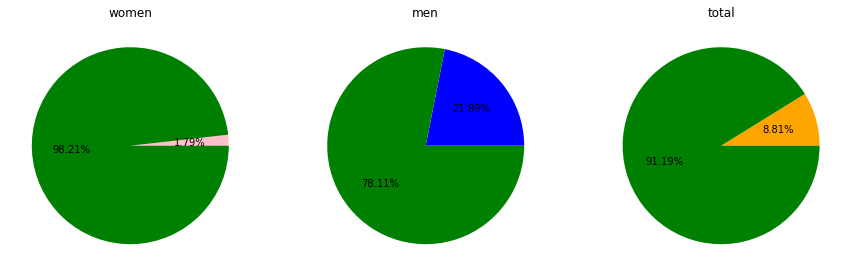

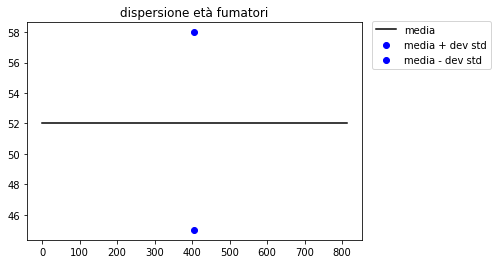

In [7]:
# =============
# DATI SUL FUMO
# =============

# mi creo le maschere per selezionare i dati
mask_smoke = md.get_mask_equal("smoke", 1)
mask_no_smoke = md.get_mask_equal("smoke", 0)


# ottengo i dati dei fumatori utilizzando la makera relativa al sesso e quella per il fumo
women_smokers = md.select_by_mask("age", mask_women & mask_smoke)
men_smokers   = md.select_by_mask("age", mask_men & mask_smoke)
smokers       = md.select_by_mask("age", mask_smoke)

# grafico fumatori rispetto ai rispettivi campioni
plot_bar(women_ages.size, men_ages.size, ages.size, "blue", 0.5)
plot_bar(women_smokers.size, men_smokers.size, smokers.size, "orange", 1.)
plt.title("fumatori")
plt.show()


# ===========
# percentuali
# ===========
women_smoke_perc = (women_smokers.size  / women_ages.size) * 100.
men_smoke_perc   = (men_smokers.size / men_ages.size)    * 100.
smokers_perc     = (smokers.size / ages.size)           * 100.

# grafico percentuali
plot_perc(women_smoke_perc, men_smoke_perc, smokers_perc)
plt.show()



# =========================================================
# medie (np.mean(data) è un modo equivalente a data.mean())
# varianza
# deviazione standard
# =========================================================
women_smokers_mean = np.mean(women_smokers)
men_smokers_mean   = np.mean(men_smokers)
smokers_mean       = np.mean(smokers)


# calcolo la varianza
women_smokers_var = np.var(women_smokers)
men_smokers_var   = np.var(men_smokers)
smokers_var       = np.var(smokers)


# calcolo della deviazione standard
women_smokers_std = np.std(women_smokers)
men_smokers_std   = np.std(men_smokers)
smokers_std       = np.std(smokers)


# grafico media e deviazione stdard
plt.scatter( women_smokers.size // 2,   int((women_smokers_mean + women_smokers_std) / 365.),          color ="blue",   label="media + dev std")
plt.plot(np.arange(women_smokers.size), np.full_like(women_smokers,int(women_smokers_mean / 365.)),    color ="black",  label="media")
plt.scatter( women_smokers.size // 2,   int((women_smokers_mean - women_smokers_std) / 365.),          color ="blue",   label="media - dev std")
plt.legend(bbox_to_anchor=(1.4, 1.03)) 
plt.title("dispersione età fumatori")
plt.show()




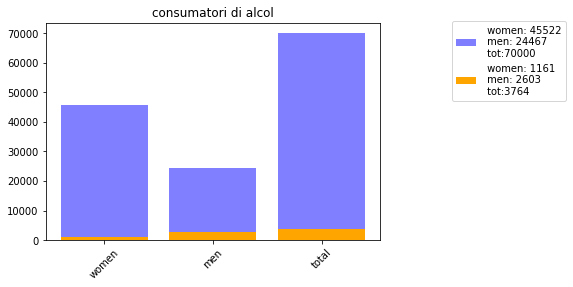

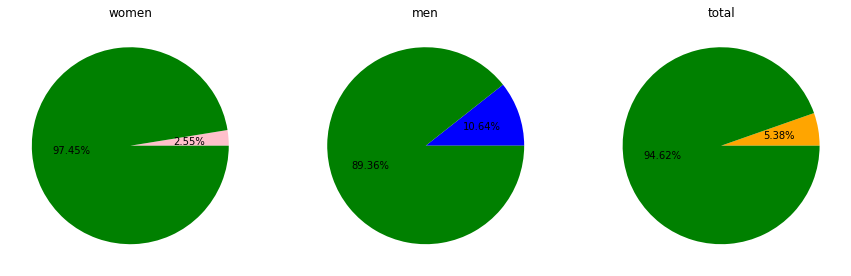

In [8]:
# ===============
# DATI SULL'ALCOL
# ===============

# mi creo le maschere per selezionare i dati
mask_alco  = md.get_mask_equal("alco", 1)
mask_no_alco = md.get_mask_equal("alco", 0)


# ottengo i dati dei consumatori di alcol utilizzando la maskera relativa al sesso e quella per il fumo
women_alcols = md.select_by_mask("age", mask_women & mask_alco)
men_alcols   = md.select_by_mask("age", mask_men & mask_alco)
alcols       = md.select_by_mask("age", mask_alco)

# grafico consumatori alcol rispetto ai rispettivi campioni
plot_bar(women_ages.size, men_ages.size, ages.size, "blue", 0.5)
plot_bar(women_alcols.size, men_alcols.size, alcols.size, "orange", 1.)
plt.title("consumatori di alcol")
plt.show()


# ===========
# percentuali
# ===========
women_alcols_perc = (women_alcols.size  / women_ages.size) * 100.
men_alcols_perc   = (men_alcols.size / men_ages.size)    * 100.
alcols_perc       = (alcols.size / ages.size)           * 100.

# grafico percentuali
plot_perc(women_alcols_perc, men_alcols_perc, alcols_perc)
plt.show()



# =========================================================
# medie (np.mean(data) è un modo equivalente a data.mean())
# varianza
# deviazione standard
# =========================================================
women_alcols_mean = np.mean(women_alcols)
men_alcosl_mean   = np.mean(men_alcols)
alcols_mean      = np.mean(alcols)


# calcolo la varianza
women_alcols_var = np.var(women_alcols)
men_alcols_var   = np.var(men_alcols)
alcols_var       = np.var(alcols)


# calcolo della deviazione standard
women_alcols_std = np.std(women_alcols)
men_alcols_std   = np.std(men_alcols)
alcols_std       = np.std(alcols)






# **Richiesta 4**





La pressione arteriosa in un individuo si calcola mettendo a rapporto la pressione sistolica (massima) con la pressione diastolica (minima).

\begin{align}
  ap = {  {ap\_hi} \over {ap\_lo}}
\end{align}

* Calcolare la pressione per ogni individuo del dataset e aggiungere la nuova colonna dopo  ap_lo.
Vedere cheat_sheet di pandas alla voce: Aggiungere una colonna


Modificare la classe sviluppata all'inizio dell'esercizio



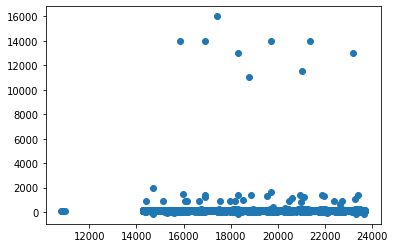

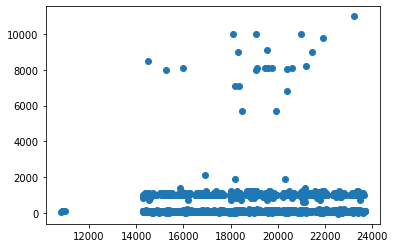

In [9]:
# Seleziono le colonne reltative alla pressione massima e minima e visualizzo graficamente
# i risultati distribuiti in base all'età

ap_hi = md.select("ap_hi")
ap_lo = md.select("ap_lo")

plt.scatter(ages, ap_hi)
plt.show()
plt.scatter(ages, ap_lo)
plt.show()



# Mi accorgo che il dataset, per questo tipo di dati, contiente molti valori furoi scala
# se confrontati con le tabelle mediche sulla pressione. 
# Ci sono valori che vanno ben oltre i massimi e i mini consentiti ed altri settati
# a zero. 


In [10]:
# Come soluzione a questo problema decido:
#    1) calcolo la pressione arteriosa, applicando la formula ad ogni elemento dei dati
#    2) controllo se il valore corrente di ap_lo e applico la formula solo se questo
#       dovesse risultare diverso da zero.
#    3) mi creo due maschere per filtrare l'accesso ai dati basati sulla pressione,
#       imponendo il range minimo e massimo della pressione arteriosa.



# Creo una funzione ausliare per calcolare gli elementi della nuova colonna
# e aggiungere questa ad un MedicalDataframe.
def insert_ap(d: MedicalData):

  # se è già presente la colonna "ap" nel 
  # dataframe la funzione termina.
  # Evita di generare errori in Coolab.
  if "ap" in d.df:
    return

  ap_hi = d.select("ap_hi")
  ap_lo = d.select("ap_lo")
  ap = np.zeros_like(ap_hi, np.float32)
  for i in range(ap.size):
    hi = ap_hi[i]
    lo = ap_lo[i]

    # controlla se ci sono valori di lo uguali a zero 
    if lo != 0:
      ap[i] = float(hi) / float(lo)

  d.df.insert(7, "ap", ap)



# Uso la funzione ausiliaria e visualizzo la tabella
# per controllare se l'inserimento é avvenuto nel modo corretto.
insert_ap(md)
md.display()



# Creo i valori limite della pressione arteriosa applicando la formula 
# sulla base dei valori estremi nella tabella media sulla pressione.
ap_limit_min = 90. / 60.
ap_normal    = 139. / 89.
ap_limit_max = 180. / 110.


# Creo due maskere per filtrare i dati sui valori limite.
# Tutti i dati, nelle altre tabelle, che mostrano anomalie (sono fuori range)
# verranno esclusi dalla selezione.
mask_ap = md.get_mask_greaterequal("ap", ap_limit_min) & md.get_mask_lessequal("ap", ap_limit_max)



,id,age,sex,height,weight,ap_hi,ap_lo,ap,cholesterol,gluc,smoke,alco,active,cardio
22343,31922,10798,2,175,92.0,100,60,1.666667,1,1,0,0,1,0
30666,43842,10859,1,159,59.0,120,80,1.500000,1,1,0,0,1,0
6219,8850,10878,1,175,59.0,120,80,1.500000,1,1,0,0,1,0
55905,79749,10964,1,160,59.0,110,70,1.571429,1,1,0,0,1,0
31762,45362,14275,1,164,105.0,150,110,1.363636,3,3,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36603,52297,23687,2,163,55.0,120,80,1.500000,3,1,1,0,1,1
20931,29892,23690,1,165,63.0,150,90,1.666667,2,1,0,0,1,1
50714,72373,23692,2,167,68.0,120,80,1.500000,2,2,0,0,0,1
68005,97124,23701,1,178,75.0,120,80,1.500000,1,1,0,0,1,1


# **Richiesta 5**




**meida**
* Qual'è la pressione media tra i fumatori e i non fumatori?
* Qual'è la pressione media tra chi consuma e chi non cosuma alcol?

**varianza**
* Come varia la pressione tra i fumatori?
* Come varia la pressione tra i consumatori di alcol?

**deviazione standard**
* Come è distribuito il dato della pressione nei fumatori
* come è distribuito il dato della pressione nei "bevitori"

**correlazione**
 * Rapportare la pressione dei fumatoi e dei "bevitori" e verificare il grado di correlazione (statistica descrittiva 3)




**visualizzazione**

* Visualizzare la distribuzione dei valori della pressione di fumatori e consumatori di alcolo con le mededie.
* Visualizzare la distrubuzione dei valori della pressione di fumatori e cosumatori di alcol ed evidenziari i valori critici rispetto alla seguete tabella (ricordarsi di valutare il rapporto sistolica / diastolica).




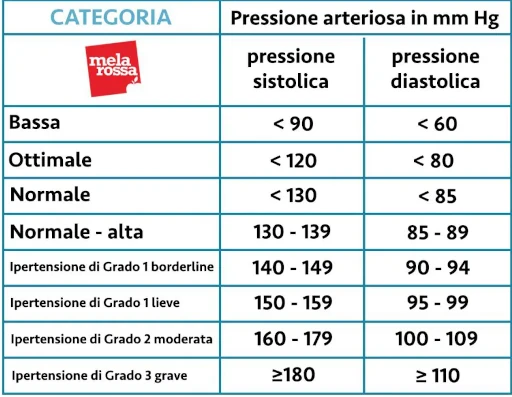

In [11]:
# Ottengo i dati filtrati dalle maschere della pressione.
# In questo modo si avranno colonne delle stesse dimensioni,
# ottenute "tagliando" le righe corrispondenti ai valori di pressione anomali.



# pressione dei fumatori e non fumatori 
smokers_ap         = md.select_by_mask("ap",  mask_ap  & mask_smoke)
no_smokers_ap      = md.select_by_mask("ap",  mask_ap  & mask_no_smoke)
# età dei fumatori e non fumatori tagliati sul range della pressione
ages_smokers_cut    = md.select_by_mask("age", mask_ap  & mask_smoke) 
ages_no_smokers_cut = md.select_by_mask("age", mask_ap  & mask_no_smoke) 



# pressione consumatori di alcol e non 
alcols_ap         = md.select_by_mask("ap",  mask_ap  & mask_alco)
no_alcols_ap      = md.select_by_mask("ap",  mask_ap  & mask_no_alco)
# età consumatori di alcol e non tagliati sul range della pressione
ages_alcols_cut    = md.select_by_mask("age", mask_ap  & mask_alco) 
ages_no_alcols_cut = md.select_by_mask("age", mask_ap  & mask_no_alco) 



In [12]:
# medie
smokers_ap_mean     = np.mean(smokers_ap)
no_smokers_ap_mean  = np.mean(no_smokers_ap)

alcols_ap_mean    = np.mean(alcols_ap)
no_alcols_ap_mean = np.mean(no_alcols_ap)


# varianza
smokers_ap_var     = np.var(smokers_ap)
no_smokers_ap_var  = np.var(no_smokers_ap)

alcols_ap_var    = np.var(alcols_ap)
no_alcols_ap_var = np.var(no_alcols_ap)

# deviazione standar
smokers_ap_std    = np.std(alcols_ap)
no_smokers_ap_std  = np.std(no_alcols_ap)

alcols_ap_std    = np.std(alcols_ap)
no_alcols_ap_std = np.std(no_alcols_ap)


# coefficiente di correlazione tra età e pressione
smokers_ap_cor = np.corrcoef(ages_smokers_cut, smokers_ap)
alcols_ap_cor  = np.corrcoef(ages_alcols_cut,  alcols_ap)




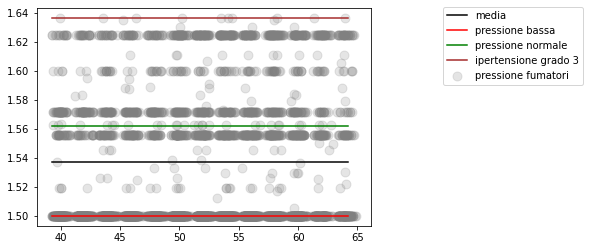

In [13]:
# visualizzazione della concentrazione dei dati 
# sulla pressione dei fumatori rispetto all'età

# trasformo l'età passando al conteggio in anni
sx = ages_smokers_cut / 365
plt.scatter(sx, smokers_ap, color="gray", s=80, alpha=0.2, label="pressione fumatori")

# pressione media dei fumatori
# creo i valori delle ascisse su età massima e minima
lx = np.arange(np.min(sx), np.max(sx))
plt.plot(lx, np.full_like(lx, smokers_ap_mean), color="black", label="media")

# limiti della pressione
plt.plot(lx, np.full_like(lx, ap_limit_min), color="red", label= "pressione bassa")
plt.plot(lx, np.full_like(lx, ap_normal),    color="green", label= "pressione normale")
plt.plot(lx, np.full_like(lx, ap_limit_max), color="brown", label = "ipertensione grado 3")

plt.legend(bbox_to_anchor=(1.2, 1.03)) 
plt.show()

(-1.25, 1.25)

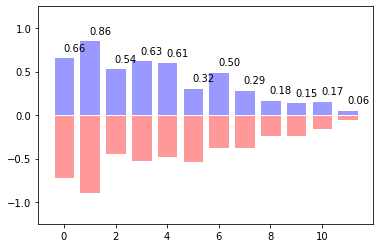

In [120]:
data = pd.DataFrame({'España' : [826, 943, 942, 901],
                     'Colombia': [668, 781, 791, 813],
                     'México': [488, 553, 563, 537]},
                    index=('Lunes', 'Martes', 'Miercoles', 'Jueves'))

x = np.arange(n)
width = 0.25
print(x)
plt.figure(figsize=(20,15),linewidth=20,edgecolor='peru',facecolor='moccasin')
plt.barh(x - 0.25, data.España, label='España',height=width)
plt.barh(x, data.Colombia, label='Colombia',height=width)
plt.barh(x + 0.25, data.México, label='México',height=width)
plt.xticks(x, data.index)
plt.legend(loc='best')
plt.show()

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
data = pd.DataFrame({'España' : [826, 943, 942, 901],
                     'Colombia': [668, 781, "alla", 813],
                     'México': [488, 553, 563, 537]},
                    index=('Lunes', 'Martes', 'Miercoles', 'Jueves'))
total = data.sum(axis=1)
print(data)
display(data)
print(total)

plt.barh(total.index, total)
plt.show()


(-1.25, 1.25)

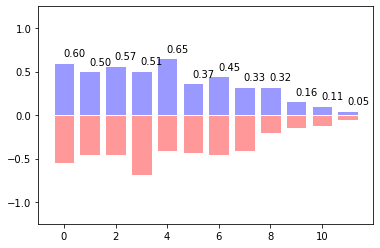

In [121]:
n = 12
X = np.arange(n)
Y1 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)
Y2 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)

plt.bar(X, +Y1, facecolor='#9999ff', edgecolor='white')
plt.bar(X, -Y2, facecolor='#ff9999', edgecolor='white')

for x, y in zip(X, Y1):
    plt.text(x + 0.4, y + 0.05, '%.2f' % y, ha='center', va='bottom')

plt.ylim(-1.25, +1.25)